<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/omega_demo_monthly_csv_data_tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Comparing the Omega Measure across asset class**

---



**1. Load libraries and input**

In [1]:
pip install yfinance --upgrade --no-cache-dir

In [2]:
# Import libraries
import pandas as pd
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Version check
print ('pandas version: ', pd.__version__)
print ('yfinance version: ', yf.__version__)
print ('matplotlib version: ', mpl.__version__)

pandas version:  1.5.3
yfinance version:  0.2.37
matplotlib version:  3.7.1


In [3]:
# Create class of formats
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**2. Import and process and review historical data**

In [4]:
# Import data from CSV in github
url = 'https://raw.githubusercontent.com/rhysdavies21/library/master/historical_financial_data_series.csv'
raw_data = pd.read_csv(url)
raw_data = raw_data.dropna()                                       # Drop all rows that have any NaN values
raw_data = raw_data.set_index('Date')

# Review data
start_date = raw_data.index[0]
end_date = raw_data.index[len(raw_data)-1]

print(color.BOLD+' start_data: '+color.END, start_date)
print(color.BOLD+' end_date: '+color.END, end_date)
print('\n',color.BOLD+'Review shape of raw_data: '+color.END, raw_data.shape)

print('\n', color.UNDERLINE+color.BOLD+'Review dataframe of input data - head:'+color.END)
display(raw_data.head())

print('\n', color.UNDERLINE+color.BOLD+'Review dataframe of input data - tail:'+color.END)
display(raw_data.tail())

 start_data:  4-Jan-05
 end_date:  2-Jun-14

 Review shape of raw_data:  (114, 6)

 Review dataframe of input data - head:


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
4-Jan-05,599.660027,188.9,2544.55,610.268260,155.44,156.62
1-Feb-05,598.227176,189.6,2577.03,609.325902,155.53,156.56
1-Mar-05,592.015823,190.5,2637.88,614.146672,154.36,155.01
1-Apr-05,597.635871,191.6,2610.80,609.977156,155.55,156.18
3-May-05,584.026420,192.0,2587.50,595.867900,157.93,159.31



 Review dataframe of input data - tail:


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
3-Feb-14,745.869365,254.2,4717.39,964.072370,249.66,263.36
3-Mar-14,743.181136,254.8,4914.92,993.232135,250.65,264.54
1-Apr-14,746.578473,255.7,4898.04,1012.447384,249.89,263.48
2-May-14,730.373444,255.9,5039.52,1001.179609,250.96,265.84
2-Jun-14,738.528604,256.3,5091.27,1025.480712,251.81,266.92


In [5]:
# Change into performance metric
new_df = raw_data.pct_change(periods=1)  # Calculate performance: (data_adjclose['asset'][1] / data_adjclose['asset'][0] ) -1
# new_df = new_df.dropna()                              # Drop all rows that have any NaN values

# Create asset_list
asset_list = list(new_df.columns)[0:]

# Review data
print('\n', color.UNDERLINE+color.BOLD+'Review dataframe of performance data - head:'+color.END)
display(new_df.head())

print('\n', color.UNDERLINE+color.BOLD+'Review dataframe of performance data - tail:'+color.END)
display(new_df.tail())

print('\n',color.BOLD+'Review shape of new_df: '+color.END, new_df.shape)
print('\n', color.BOLD+'asset_list: '+color.END, asset_list)


 Review dataframe of performance data - head:


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
4-Jan-05,NaN,NaN,NaN,NaN,NaN,NaN
1-Feb-05,-0.002389,0.003706,0.012765,-0.001544,0.000579,-0.000383
1-Mar-05,-0.010383,0.004747,0.023612,0.007912,-0.007523,-0.009900
1-Apr-05,0.009493,0.005774,-0.010266,-0.006789,0.007709,0.007548
3-May-05,-0.022772,0.002088,-0.008924,-0.023131,0.015301,0.020041



 Review dataframe of performance data - tail:


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
3-Feb-14,0.003040,0.006334,-0.036774,-0.035881,0.015663,0.024149
3-Mar-14,-0.003604,0.002360,0.041873,0.030246,0.003965,0.004481
1-Apr-14,0.004571,0.003532,-0.003434,0.019346,-0.003032,-0.004007
2-May-14,-0.021706,0.000782,0.028885,-0.011129,0.004282,0.008957
2-Jun-14,0.011166,0.001563,0.010269,0.024272,0.003387,0.004063



 Review shape of new_df:  (114, 6)

 asset_list:  ['HFRXGL_GBP', 'UKRPI', 'UKXT', 'MXWO_GBP', 'QX6G', 'QX6I']


**3. Define calc_function to calculate and illustrate Omega by asset and threshold**

In [10]:
# Input threshold_list as a list of threshold values (on a daily basis)
# calc_omega is function to create omega by asset for a given input of threshold
# Inner loops over asset to calculate omega for some threshold. Then outer loop to calculate list of (list) omegas by asset for varying thresholds

def calc_omega(threshold_list):

  update_new_df = new_df        # new dataframe to include gains, losses and omegas
  omega_by_asset = []           # list of (lists) omega outputs by underlying asset for particular threshold
  col_threshold =[]             # column of threshold values
  annualised_col_threshold =[]             # column of annualised threshold values

  for t in threshold_list:
    threshold = t

    vec_assets = []             # vector of assets for some threshold
    vec_losses = []             # vector of losses for some threshold
    vec_gains = []              # vector of gains for some threshold
    vec_omega = []              # vector of omegas for some threshold

    for a in asset_list:

      update_new_df['loss_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x < threshold else float(0)) * (threshold - update_new_df[a])
      update_new_df['gain_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x > threshold else float(0)) * (update_new_df[a] - threshold)

      vec_assets.append(a)
      #vec_losses.append(sum(update_new_df['loss_col_'+a][1:]))
      #vec_gains.append(sum(update_new_df['gain_col_'+a][1:]))
      vec_losses.append(update_new_df['loss_col_'+a][1:].mean())
      vec_gains.append(update_new_df['gain_col_'+a][1:].mean())
      vec_omega.append(vec_gains[asset_list.index(a)] / vec_losses[asset_list.index(a)])

    omega_by_asset.append(vec_omega)
    col_threshold.append(t)
    annualised_col_threshold.append(str(round( 100*(((1+t)**12)-1)))+'%')

  output_df = pd.DataFrame(columns=asset_list[:], data=omega_by_asset)
  output_df['Annualised_Threshold_Heading'] = annualised_col_threshold
  output_df.set_index('Annualised_Threshold_Heading', inplace=True)

  print('\n', color.UNDERLINE+color.BOLD+'Review Results of Omega by Threshold:'+color.END)
  display(output_df)
  print('\n')

  ### Graph below

  plt = output_df.plot(kind='line', figsize=(20,8), linewidth=3)
  # plt = output_df.plot(kind='area', alpha=0.9, figsize=(20,8), linewidth=3)     # Alternative graph. Note that alpha denotes transparency
  plt.set_title('Omega by Threshold for group of assets', size=18)
  plt.set_xlabel('Annualised Threshold', fontsize=16)
  plt.set_ylabel('Omega value', fontsize=16)
  plt.legend(loc='upper right', fontsize=16)

  plt.plot()

  return

**4. Run the calculation**


 Review Results of Omega by Threshold:


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Annualised_Threshold_Heading,,,,,,
0%,1.252125,4.721180,1.503416,1.371351,2.599392,2.171883
3%,0.965696,1.146557,1.306971,1.194079,1.499422,1.456625
7%,0.673383,0.076643,1.071133,0.981394,0.694306,0.833958


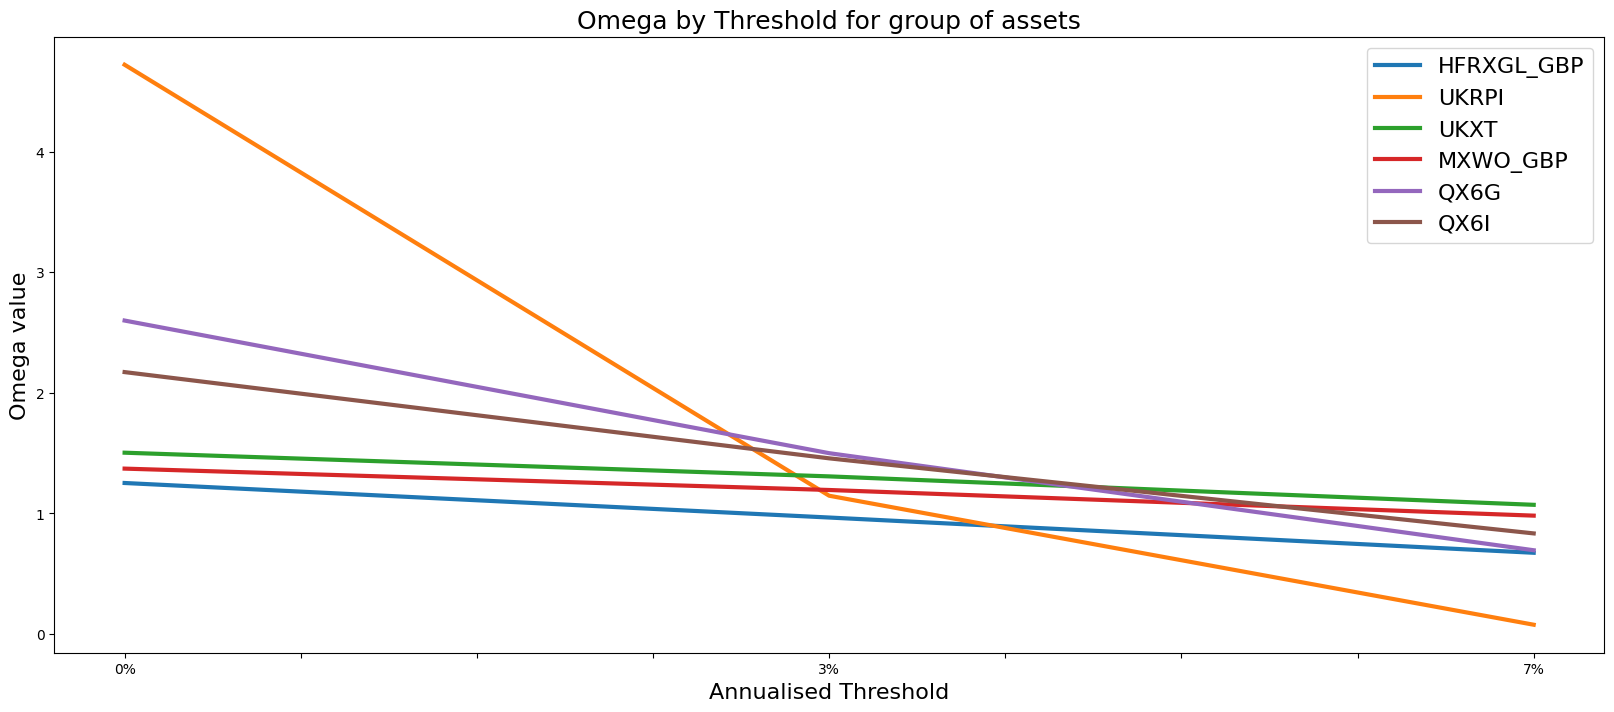

In [15]:
# Run function for some given input
# calc_omega([0/100, 0.25/100, 0.5/100, 0.75/100, 1.0/100, 1.25/100, 1.5/100, 1.75/100, 2.0/100, 2.25/100, 2.5/100, 2.75/100, 3.0/100])
calc_omega([0, 0.0025, 0.006])

**Notes**
Not production ready:
*   No error handling
*   Designed specifically for monthly data as input through CSV
*   Requires CSV data to be in standard format and denominated in same currency